In [30]:
# importando bibliotecas que serão utilizadas

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)
pd.set_option('display.precision', 2)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import iqr

In [3]:
# iniciando a coleta dos dados
# Carregar o arquivo csv no DataFrame

df = pd.read_csv('AB_NYC_2019.csv', sep=',')

# Exibir as 5 primeiras linhas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


- Após Carregar o conjunto de Dados no DataSet, antes de começarmos a analise e exploração dos dados, para isso devemos interpretar os dados e váriaveis disponiveis e obter o máximo de informações da aréa de negócio e assim termos o correto dominio do negocio.

-  Nesta etapa inclui estudar o formato do conjunto de dados geral, os tipos de todas as variáveis, verificar e limpar o conjunto de dados.

In [4]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.89e+04,4.89e+04,48895.00,48895.00,48895.00,48895.00,48895.00,38843.00,48895.00,48895.00
mean,1.90e+07,6.76e+07,40.73,-73.95,152.72,7.03,23.27,1.37,7.14,112.78
std,1.10e+07,7.86e+07,0.05,0.05,240.15,20.51,44.55,1.68,32.95,131.62
min,2.54e+03,2.44e+03,40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00
25%,9.47e+06,7.82e+06,40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00
50%,1.97e+07,3.08e+07,40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
75%,2.92e+07,1.07e+08,40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
max,3.65e+07,2.74e+08,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


In [5]:
# Analisando o conjunto de dados do DataFrame
# verifcamos que existema algumas anormalidades como preços zerados e esses registros para nossa analise devem ser removidors
# Verificamos que existem um total de 16 colunas e algumas colunas não tem valores(isnull).

df.isnull (). sum ()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# as Colunas last_review  e  reviews_per_month tem mais de 10 mil valores nulos no conjunto de dados, 
# em tese os dois se correlacionam e por isso tenham os mesmos valores de quantidade nulas.

# verificando se esta supeita é verdadeira, o que é verdade conforme analise
(df ['last_review']. isnull () == df ['reviews_per_month']. isnull ()). all ()

True

In [12]:
# No casos destes campos estarem nulos 
# e afim de evitar problemas futuros em calculos que utilizem esses campos irei colocar 0 eliminando assim o missing

df['reviews_per_month'].fillna(0,inplace = True)
df['last_review'].fillna(0,inplace = True)

# converter a coluna host_id de inteiro para string
df['host_id'] = df['host_id'].astype(str)

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Análise Exploratória de Dados (AED)

A finalidade da Análise Exploratória de Dados (AED) é examinar os dados previamente à aplicação de qualquer técnica estatística. Desta forma o analista consegue um entendimento básico de seus dados e das relações existentes entre as variáveis analisadas.

## Abordagem e estrategia da AED utilizada

|Abordagem |Estratégia|
|--|--|
| EDA | Problema → Dados → Análise → Modelo |

## Qual o objetivo dessa Análise?

O objetivo é  analisar a variação do preço de locação dos hosts e extrair informações relevantes que possam influênciar no preço de locação do host.






In [15]:
# após a analise e manutenção dos dados vamos analisar a coluna neighbourhood_group que são bairros com ofertas de locação

set(df['neighbourhood_group'])
{'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'}
df.groupby('neighbourhood_group')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,87.50,106.71,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20104.0,124.38,186.87,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.88,291.38,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.52,167.10,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.81,277.62,13.0,50.0,75.0,110.0,5000.0


In [16]:
# Esta tabela acima mostram a evolução dos preços em cada bairro com oferta de locação,
# a maioria dos apartamentos/casas ofertados Manhattan tem as taxas mais altas e o Bronx, as taxas mais baixas. 
# Manhattan e Brooklyn essas duas regiões também são os preços mais altos entre as cinco regiões. 
# Uma possível razão é que, porque as demandas nessas regiões são altas. 
# fazendo com que mais hosts aluguem seus quartos ou apartamentos.


In [17]:
# detalhando por tipo de quarto
df.pivot_table(index='neighbourhood_group',columns='room_type',values='price',aggfunc='mean')

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.51,66.79,59.80
Brooklyn,178.33,76.50,50.53
Manhattan,249.24,116.78,88.98
Queens,147.05,71.76,69.02
Staten Island,173.85,62.29,57.44


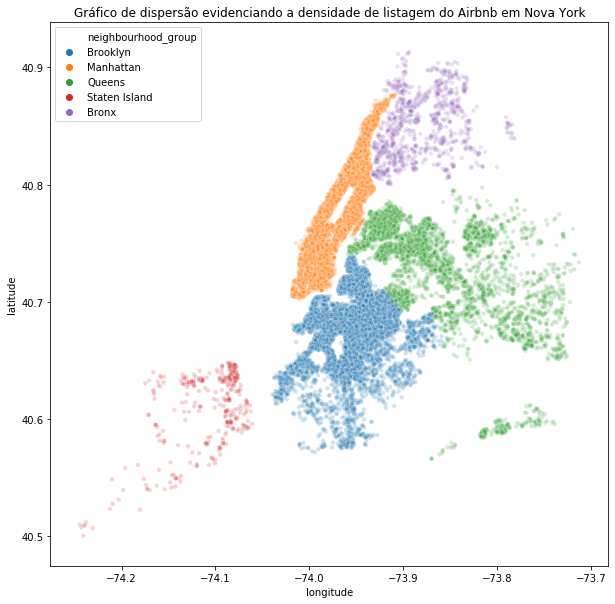

In [24]:
fig, ax = plt.subplots(figsize = (10,10))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', ax = ax, s = 20, alpha = 0.2, data=df);
plt.title('Gráfico de dispersão evidenciando a densidade de listagem do Airbnb em Nova York');

In [25]:
# O Gráfico acima mostra que há mais ofertas do Airbnb em Manhattan e Brooklyn.

In [26]:
# No Airbnb, o host pode especificar um número mínimo de noites.
# Qual é o número mínimo médio de noites por lista para os vários bairros e tipos de quartos? 

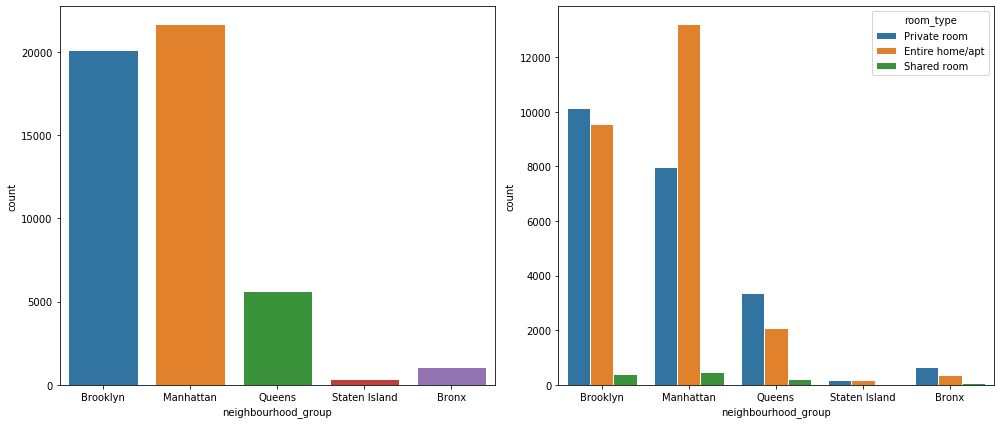

In [40]:
agrupado_por_zona = df.groupby('neighbourhood_group')
fig, ax = plt.subplots(1,2, figsize = (14,6))
sns.countplot(df['neighbourhood_group'], ax = ax[0], linewidth=1, edgecolor='w')
sns.countplot(df['neighbourhood_group'], hue = df['room_type'], ax = ax[1], linewidth=1, edgecolor='w')
plt.tight_layout();

In [35]:
# tabela dinamica com a distribuição dos preços por bairro e tipo de quarto,
# como medida de dispersão, utilizo o intervalo interquartil (IQR) e não o desvio padrão.

by_room_type = pd.pivot_table(df, values = ['price'], index = ['room_type','neighbourhood_group'], aggfunc = {"price":[np.median, np.count_nonzero, iqr]})
subtables = []
for row in by_room_type.index.levels[0]:
    subtables.append(by_room_type.loc[[row]].sort_values(by = ('price','median'), ascending = False))
by_room_type = pd.concat(t for t in subtables)

by_room_type[('price','median')] = by_room_type[('price','median')].map('$ {:.0f}'.format)
by_room_type[('price','iqr')] = by_room_type[('price','iqr')].map('$ {:.0f}'.format)
by_room_type[('price','count_nonzero')] = by_room_type[('price','count_nonzero')].map(int)

by_room_type.columns.set_levels(['number listings','IQR','median price'],level=1,inplace=True)
by_room_type.columns = by_room_type.columns.droplevel(0)
by_room_type = by_room_type[['median price', 'IQR','number listings']] # Muda a ordem da coluna
by_room_type

median price    IQR  number listings
room_type       neighbourhood_group                                     
Entire home/apt Manhattan                  $ 191  $ 116            13198
                Brooklyn                   $ 145   $ 94             9558
                Queens                     $ 120   $ 78             2096
                Bronx                      $ 100   $ 60              379
                Staten Island              $ 100   $ 76              176
Private room    Manhattan                   $ 90   $ 52             7982
                Brooklyn                    $ 65   $ 30            10126
                Queens                      $ 60   $ 28             3372
                Bronx                       $ 54   $ 30              651
                Staten Island               $ 50   $ 35              188
Shared room     Manhattan                   $ 69   $ 40              480
                Bronx                       $ 40   $ 28               60
                Queens                      $ 37   $ 24              198
                Brooklyn                    $ 36   $ 20              411
                Staten Island               $ 30   $ 46                9

## Conclusão

Após a compilação e analise exploratoria dos dados podemos observar algumas descobertas como que a maioria dos apartamentos/casas ofertados em Manhattan tem as taxas mais altas e o Bronx, as taxas mais baixas.

Manhattan e Brooklyn essas duas regiões tem os preços mais altos entre as cinco regiões e que as ofertas de hosts estão concentradas mais nessas regiões (Manhattan e Brooklyn).
 
O Por isso o fator mais relevante para influenciar no preço de locação do host é o bairro e o tipo de host ofertado por exemplo shared room são bem mais acessiveis nessas duas regiões. E que a tendência é as pessoas ficaram em hosts mais simples mas com uma localização privilegiada. 

